![Screenshot 2024-02-27 at 06.44.18.png](<attachment:Screenshot 2024-02-27 at 06.44.18.png>)
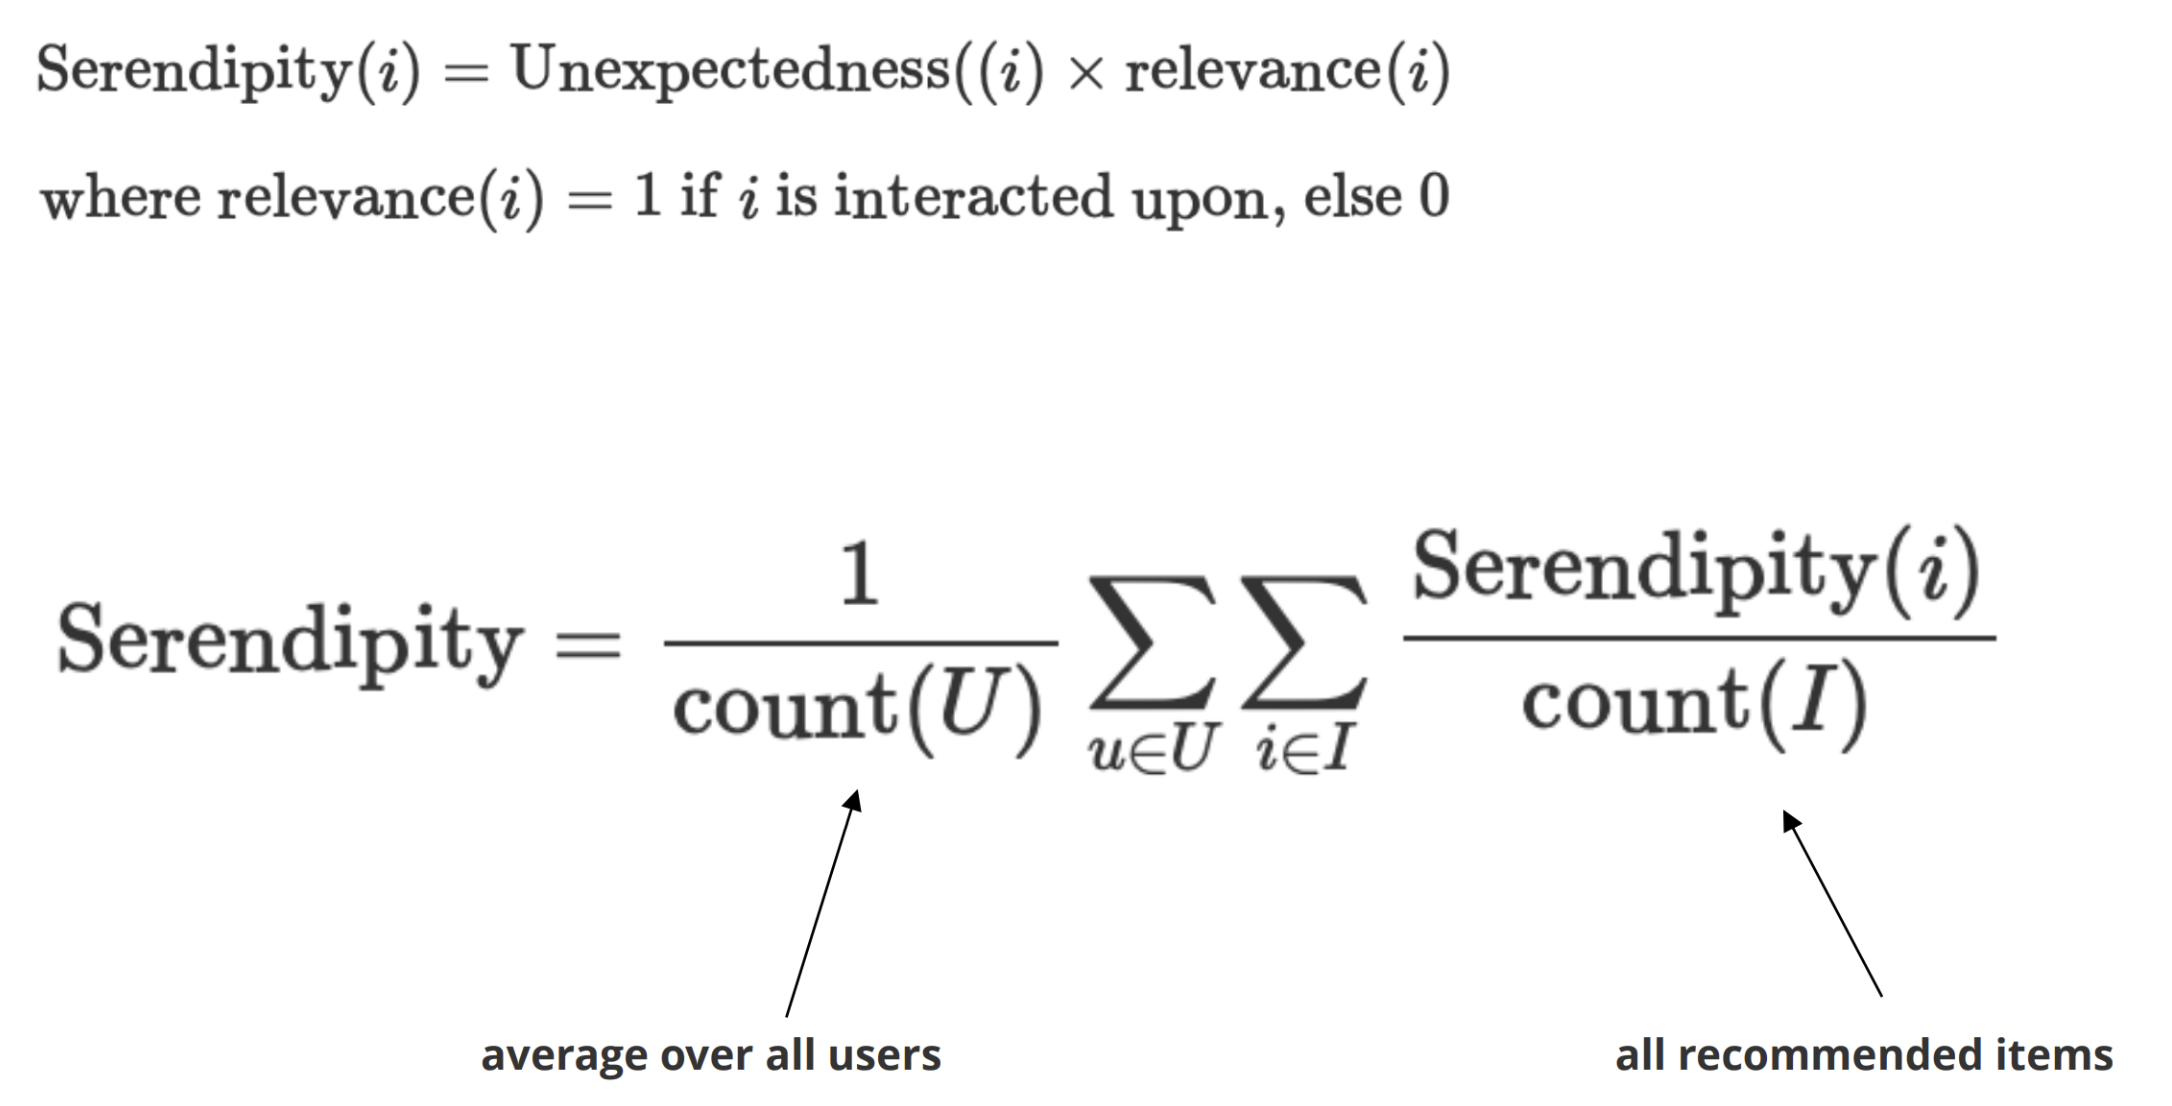

In [1]:
import numpy as np
import random

#define the genres
genres = ['Action', 'Comedy', 'Drama', 'Fantasy', 'Horror', 'Romance', 'Sci-Fi', 'Thriller']

#mock movie data with random genres and unexpectedness scores
movies = {
    'Movie1': {'genres': random.sample(genres, 2), 'unexpectedness': np.random.uniform()},
    'Movie2': {'genres': random.sample(genres, 2), 'unexpectedness': np.random.uniform()},
    'Movie3': {'genres': random.sample(genres, 2), 'unexpectedness': np.random.uniform()},
    # ... add as many movies as you need
}

#generate mock user data
users = {
    'User1': {'watched': ['Movie1'], 'preferred_genres': ['Action', 'Sci-Fi']},
    'User2': {'watched': ['Movie2'], 'preferred_genres': ['Drama', 'Romance']},
    # ... add as many users as you need
}

#function to calculate unexpectedness of a movie for a user
def calculate_unexpectedness(user, movie):
    #lower unexpectedness if the movie's genre matches user's preference
    unexpectedness = movies[movie]['unexpectedness']
    for genre in movies[movie]['genres']:
        if genre in users[user]['preferred_genres']:
            unexpectedness /= 2
    return unexpectedness

#function to determine if a movie is relevant to a user
def is_relevant(user, movie):
    #movie is relevant if the user hasn't watched it yet
    return movie not in users[user]['watched']

#calculate serendipity scores
def calculate_serendipity(users, movies):
    serendipity_scores = []
    
    for user in users:
        user_serendipity_scores = []
        for movie in movies:
            if is_relevant(user, movie):
                relevance = 1
            else:
                relevance = 0
            unexpectedness = calculate_unexpectedness(user, movie)
            serendipity_score = unexpectedness * relevance
            user_serendipity_scores.append(serendipity_score)
        
        #avoid division by zero if user has no relevant movies
        if len(user_serendipity_scores) > 0:
            serendipity_scores.append(np.mean(user_serendipity_scores))
    
    #avoid division by zero if there are no users
    if len(serendipity_scores) > 0:
        overall_serendipity = np.mean(serendipity_scores)
    else:
        overall_serendipity = 0

    return overall_serendipity

# calculate and print the overall serendipity score
overall_serendipity = calculate_serendipity(users, movies)
print(f'Overall Serendipity Score: {overall_serendipity}')


Overall Serendipity Score: 0.17501726538302648
